In [52]:
import pandas as pd, sklearn.metrics as metrics, matplotlib.pyplot as plt, seaborn as sns, numpy as np

# Modèles de classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Optimisation des modèles et validation croisee
from sklearn.model_selection import GridSearchCV, cross_val_score

# Création des pipelines (optionnel)
from sklearn.pipeline import Pipeline

# Standardisation des données
from sklearn.preprocessing import StandardScaler

# Réduction dimensionelle
from sklearn.decomposition import PCA

# Séparation des données
from sklearn.model_selection import train_test_split

# Données

## Données sources

Le métier nous demande une certaine tâche, des _insight_ ou à peut près n'importe quoi (surtout n'importe quoi).
J'ai pour cela un certains jeu de données, sur les caractéristiques de molécules.

In [74]:
df = pd.read_csv('./Course-MachineLearning/donnees/Breast Cancer Wisconsin/data.csv')
df.set_index('id', inplace=True)

In [75]:
df.shape

(569, 32)

> Si beaucoup de colonnes, je n'arrive pas à faire de _feature engineering_ pertinent, le PCA sera mon ami.

In [78]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
866083,1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,0.1761,...,35.64,113.20,848.7,0.14710,0.28840,0.37960,0.13290,0.3470,0.07900,NaN
893526,0,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,...,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192,NaN
8611792,1,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.193700,0.146900,0.1634,...,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203,NaN
926682,1,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,NaN
9112712,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.010430,0.1621,...,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211,NaN


In [77]:
df['diagnosis'] = df.diagnosis.map({'M':1, 'B':0})

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [81]:
df.dropna(axis='columns', inplace=True)

In [82]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
# On choisit une cible, qui correspond à un problème métier
target = 'diagnosis'

## Préparation des ensembles de données pour l'entraînement, le test et la validation

In [86]:
X, y = df.drop(target, axis=1), df[target]

### Traitement et validation

In [87]:
X_treat, X_val, y_treat, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=0,
    stratify=y
)

### Entrainement et test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X_treat, y_treat, 
    test_size=0.2, 
    random_state=0,
    stratify=y_treat
)

# Etude des modèles

## Préparation des données pour le ML

Cette préparation des données pour le ML est une étape cruciale. Elle consiste à transformer les données brutes en un format que les algorithmes de ML peuvent comprendre (particulièrement le _scaling_ -> standardisation ici).

A ce moment là il s'agit d'opérations de prétraitement **automatiques** (organisées ici en Pipelines) qui seront appliquées à l'ensemble des données. Contrairement à l'analyse exploratoire des données qui vient avant, durant laquelle on peut être amené à déjà réaliser différentes tâches de sélections, transformation, créations de _features_ (= colonnes).

In [89]:
tmp_models = [SVC(probability=True), KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression()]

In [90]:
models = {}

In [91]:
for model in tmp_models:
    models[model.__class__.__name__] = {
        'pl' : Pipeline([
            ('scaler', StandardScaler()), # standardisation des données
            ('pca', PCA(0.95)), # réduction de dimension, ici on garde 95% de la variance (mais on pourrait aussi le tester dans le Grid)
            ('model', model)
        ]),
        'params' : {}
    }

In [92]:
models

{'SVC': {'pl': Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                  ('model', SVC(probability=True))]),
  'params': {}},
 'KNeighborsClassifier': {'pl': Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                  ('model', KNeighborsClassifier())]),
  'params': {}},
 'RandomForestClassifier': {'pl': Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                  ('model', RandomForestClassifier())]),
  'params': {}},
 'LogisticRegression': {'pl': Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                  ('model', LogisticRegression())]),
  'params': {}}}

## Etudes des hyper-paramètres (Optimisation)

Les hyper-paramètres sont des paramètres qui ne sont pas appris par le modèle mais qui sont fixés avant l'apprentissage. Ils sont déterminants pour la qualité du modèle. Il est donc important de les étudier pour trouver les meilleurs -> `GridSearchCV` créer une "grille" de comparaison, à partir des hyper-paramètres donnés.

Les modèles de `sklearn` sont donnés avec une méthodes `get_params()` qui permet de lister les hyper-paramètres.

In [93]:
"H-P de la LogisticRegression : " + str(list(LogisticRegression().get_params().keys()))

"H-P de la LogisticRegression : ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']"

On peut s'amuser à les tester un par un, ou bien utiliser `GridSearchCV` pour les tester tous en même temps.

In [94]:
# Grille de paramètres
# La syntaxe est la suivante : nom_du_modele__nom_du_parametre, pour chaque paramètre à tester dans la grid

models['LogisticRegression']['params'] = {'model__C': [0.01, 0.1, 1, 10, 100]}

models['RandomForestClassifier']['params'] = {'model__n_estimators': range(10, 500, 50)}

models['SVC']['params'] = {
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}

models['KNeighborsClassifier']['params'] = {
    'model__n_neighbors': range(1, 10, 1)
}

In [95]:
for model in models.keys():
    grid = GridSearchCV(
        estimator=models[model]['pl'], # la pipeline de transformation + modèle
        param_grid=models[model]['params'], # paramètres à a tester pour trouver l'optimal
        cv = 5, scoring = 'roc_auc', n_jobs = -1
    )
    grid.fit(X_train, y_train) # training
    models[model]['grid'] = grid

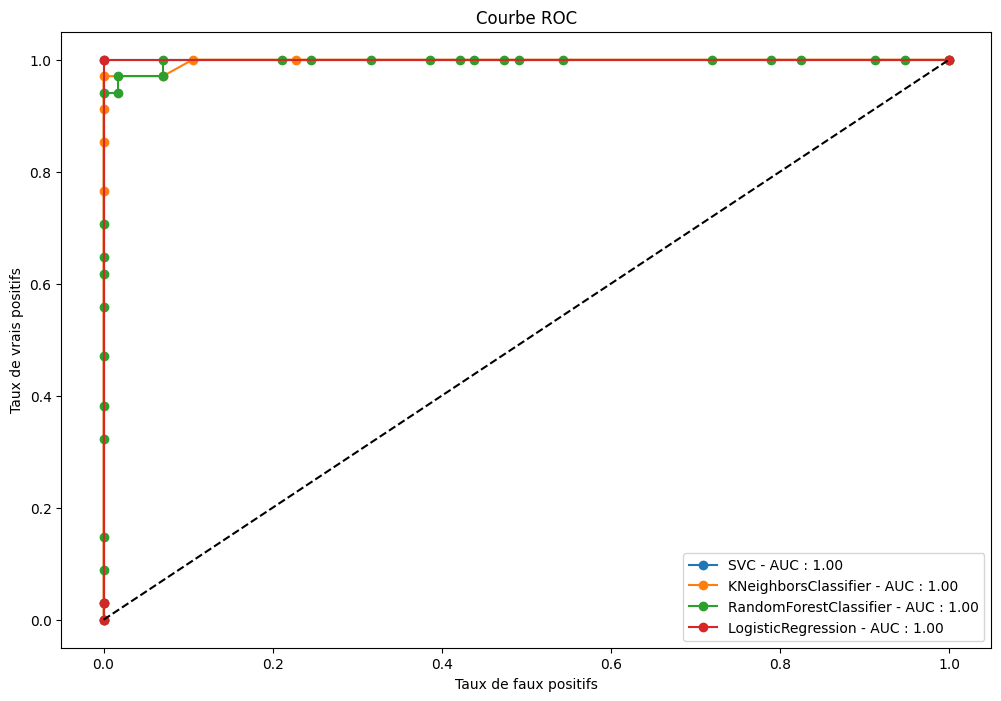

In [96]:
# Affichage de la courbe ROC
plt.figure(figsize = (12, 8))

for model_name, comp in models.items():
    y_pred = comp['grid'].predict_proba(X_test)[:,1]
    fpr, tpr, seuils = metrics.roc_curve(y_test, y_pred) # Courbe ROC
    auc = metrics.auc(fpr, tpr) # Aire sous la courbe
    plt.plot(fpr, tpr, label = model_name + ' - AUC : {:.2f}'.format(auc), marker = 'o')

plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

> L'utilisation de `predict_proba` est souvent plus pertinente que `predict` pour les modèles de classification. En effet ici sur la courbe ROC on peut alors constater le seuil de décision optimal (plutôt que se cantonner à 50% tout le temps).

## Validation croisée

(En réalité ici, c'est une étape répétitive, le Grid Search CV réalise déjà la validation croisée, mais néanmoins seulement sur les données d'entraînement)

In [97]:
cvs = []

for model_name, comp in models.items():
    print(model_name)
    print(comp['grid'].best_params_)
    print(comp['grid'].best_score_)

    cv = cross_val_score(comp['grid'], X_treat, y_treat, cv = 5, scoring = 'roc_auc')
    print('Moyenne de la cross-validation : {:.2f}'.format(cv.mean()))
    print('Ecart-type de la cross-validation : {:.2f}'.format(cv.std()))
    print('\n')

    cvs.append(cv)

SVC
{'model__kernel': 'rbf'}
0.9938665235283592


Moyenne de la cross-validation : 0.99
Ecart-type de la cross-validation : 0.01


KNeighborsClassifier
{'model__n_neighbors': 9}
0.9880723615264678


Moyenne de la cross-validation : 0.99
Ecart-type de la cross-validation : 0.01


RandomForestClassifier
{'model__n_estimators': 310}
0.9901634588349564


Moyenne de la cross-validation : 0.99
Ecart-type de la cross-validation : 0.01


LogisticRegression
{'model__C': 0.1}
0.9938808373590982


Moyenne de la cross-validation : 0.99
Ecart-type de la cross-validation : 0.01




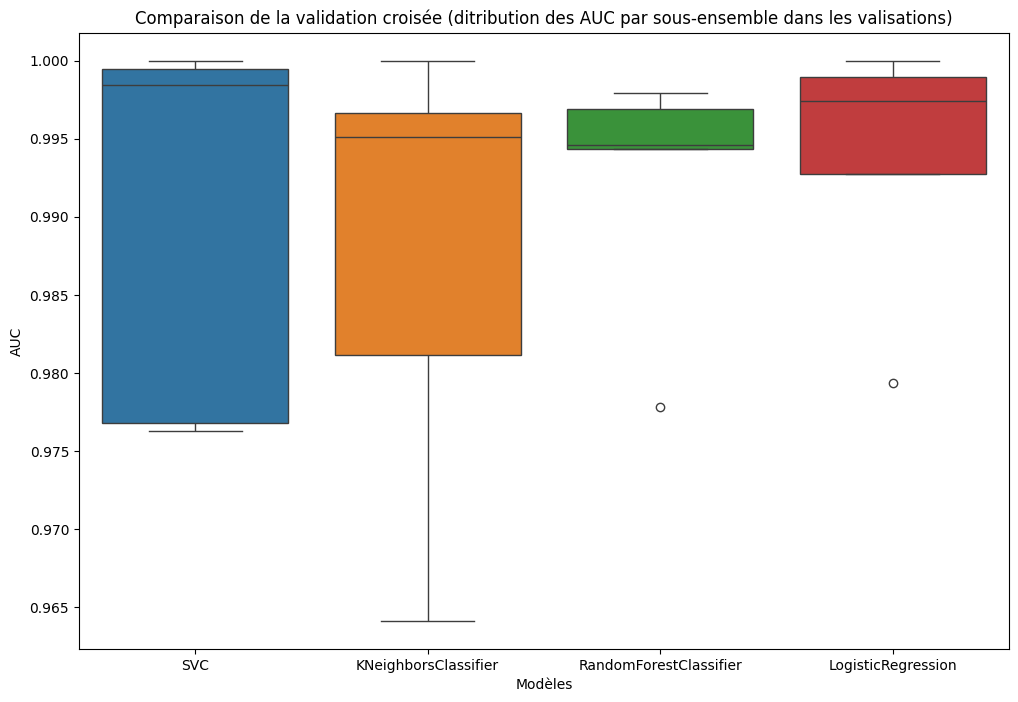

In [99]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = cvs)
plt.xticks(range(len(models)), models.keys())
plt.xlabel('Modèles')
plt.ylabel('AUC')
plt.title('Comparaison de la validation croisée (ditribution des AUC par sous-ensemble dans les valisations)')
plt.show()

## Validation finale

On utilise ici les dataset pour le moment intouché de validation. C'est donc de toutes nouvelles données rencontrées par le modèle. 

A la suite de la cross-validation, on a donc une bonne idée précise et objective des performances d'un modèle donné.